In [69]:
import cox
from cox.utils import Parameters
import cox.store as store
from cox.readers import CollectionReader

import seaborn as sns
import matplotlib.pyplot as plt

LEARNING_RATES = [1e-1, 1e-2, 1e-3]

In [70]:
trunc_reader = CollectionReader('/home/pstefanou/cifar-10/resnet-18/trunc_ce_step_lr')

100%|██████████| 6/6 [00:00<00:00, 46.21it/s]


In [71]:
standard_reader = CollectionReader('/home/pstefanou/cifar-10/resnet-18/ce_step_lr')

100%|██████████| 4/4 [00:00<00:00, 51.48it/s]


In [72]:
trunc_logs = trunc_reader.df('logs')
trunc_logs = trunc_logs[trunc_logs['epoch'] < 51]

In [73]:
standard_logs = standard_reader.df('logs')
standard_logs.head()

,epoch,val_prec1,val_loss,train_prec1,train_loss,time,exp_id
0,1,35.992802,1.802025,25.174009,2.055155,12.125422,98c00f6a-10d0-4c37-b7d0-8cfcab6552cc
1,2,47.390522,1.540594,37.377571,1.739385,24.067562,98c00f6a-10d0-4c37-b7d0-8cfcab6552cc
2,3,53.269344,1.391855,43.291794,1.575345,36.039607,98c00f6a-10d0-4c37-b7d0-8cfcab6552cc
3,4,55.428913,1.267142,47.509693,1.463570,47.984933,98c00f6a-10d0-4c37-b7d0-8cfcab6552cc
4,5,58.008396,1.200629,50.385532,1.372939,59.903282,98c00f6a-10d0-4c37-b7d0-8cfcab6552cc


In [74]:
trunc_metadata = trunc_reader.df('metadata')

new schema missing keys: {'temperature'}, new keys: set()
new schema missing keys: {'temperature'}, new keys: set()
new schema missing keys: {'temperature'}, new keys: set()
new schema missing keys: {'temperature'}, new keys: set()


In [75]:
standard_metadata = standard_reader.df('metadata')

In [76]:
standard_exp_ids = [standard_metadata[standard_metadata['lr'] == lr]['exp_id'] for lr in LEARNING_RATES]

In [77]:
trunc_exp_ids = [trunc_metadata[trunc_metadata['lr'] == lr]['exp_id'] for lr in LEARNING_RATES]

In [144]:
trunc_unseen = trunc_reader.df('unseen')
trunc_test = trunc_reader.df('test')

standard_unseen = standard_reader.df('unseen')
standard_test = standard_reader.df('test')

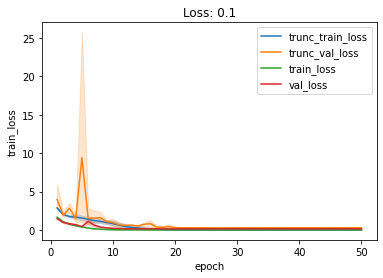

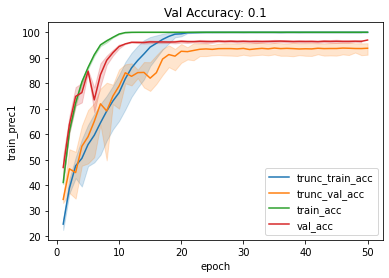

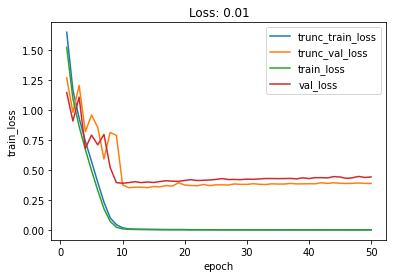

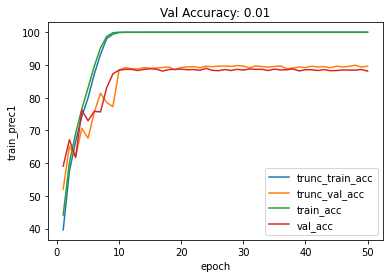

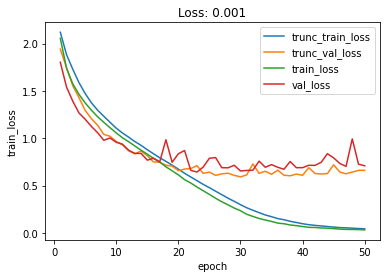

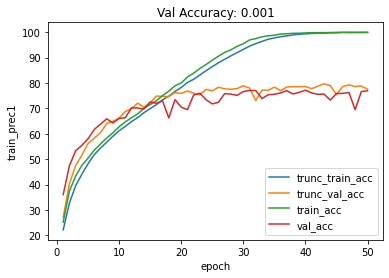

In [87]:
for i, lr in enumerate(LEARNING_RATES):
    trunc_logs_ = trunc_logs[trunc_logs.exp_id.isin(trunc_exp_ids[i])]
    standard_logs_ = standard_logs[standard_logs.exp_id.isin(standard_exp_ids[i])]
    
    tr_unseen = trunc_unseen[trunc_unseen.exp_id.isin(trunc_exp_ids[i])]
    tr_test = trunc_test[trunc_test.exp_id.isin(trunc_exp_ids[i])]
    
    sns.lineplot(data=trunc_logs_, x='epoch', y='train_loss', label='trunc_train_loss')
    sns.lineplot(data=trunc_logs_, x='epoch', y='val_loss', label='trunc_val_loss')
    sns.lineplot(data=standard_logs_, x='epoch', y='train_loss', label='train_loss')
    ax = sns.lineplot(data=standard_logs_, x='epoch', y='val_loss', label='val_loss')
    ax.set_title('Loss: ' + str(lr))
    plt.show()
    
    sns.lineplot(data=trunc_logs_, x='epoch', y='train_prec1', label='trunc_train_acc')
    sns.lineplot(data=trunc_logs_, x='epoch', y='val_prec1', label='trunc_val_acc')
    sns.lineplot(data=standard_logs_, x='epoch', y='train_prec1', label='train_acc')
    ax = sns.lineplot(data=standard_logs_, x='epoch', y='val_prec1', label='val_acc')
    ax.set_title('Val Accuracy: ' + str(lr))
    plt.show()

In [65]:
standard_exp_ids[2]

0    98c00f6a-10d0-4c37-b7d0-8cfcab6552cc
Name: exp_id, dtype: object

In [67]:
trunc_logs

,epoch,val_prec1,val_loss,train_prec1,train_loss,time,exp_id


In [90]:
sns.lineplot(trunc_unseen, )

,test_prec1,test_loss,time,exp_id
0,60.299915,1.709541,3.778235,3e24a072-2cf3-4283-8a4d-7ef0c49c798d
0,61.803616,2.150991,3.762191,57e44856-536a-4679-ad7c-f620b37e2ef9
0,67.999176,1.789935,3.763035,346a0e74-7d6c-4adc-b68c-7bd6fff4d774
0,51.146259,1.769172,3.763536,e48ce815-3bb3-49c1-a433-baf657c117e7


In [91]:
trunc_unseen

,test_prec1,test_loss,time,exp_id
0,60.299915,1.709541,3.778235,3e24a072-2cf3-4283-8a4d-7ef0c49c798d
0,61.803616,2.150991,3.762191,57e44856-536a-4679-ad7c-f620b37e2ef9
0,67.999176,1.789935,3.763035,346a0e74-7d6c-4adc-b68c-7bd6fff4d774
0,51.146259,1.769172,3.763536,e48ce815-3bb3-49c1-a433-baf657c117e7


In [145]:
trunc_unseen['lr'] = trunc_metadata[['lr']].reset_index().drop(0).drop('index', axis=1).to_numpy()

In [148]:
standard_unseen['lr'] = standard_metadata[['lr']].reset_index().drop(0).drop('index', axis=1).to_numpy()

In [149]:
trunc_test['lr'] = trunc_metadata[['lr']].reset_index().drop(0).drop('index', axis=1).to_numpy()

In [151]:
standard_test['lr'] = standard_metadata[['lr']].reset_index().drop(0).drop('index', axis=1).to_numpy()

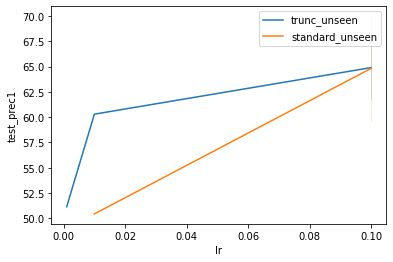

<AxesSubplot:xlabel='lr', ylabel='test_prec1'>

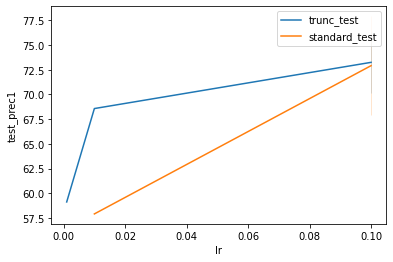

In [152]:
sns.lineplot(data=trunc_unseen, x='lr', y='test_prec1', label='trunc_unseen')
sns.lineplot(data=standard_unseen, x='lr', y='test_prec1', label='standard_unseen')
plt.show()

sns.lineplot(data=trunc_test, x='lr', y='test_prec1', label='trunc_test')
sns.lineplot(data=standard_test, x='lr', y='test_prec1', label='standard_test')

In [139]:
trunc_test

,test_prec1,test_loss,time,exp_id,lr
0,68.570000,1.287992,1.596069,3e24a072-2cf3-4283-8a4d-7ef0c49c798d,0.010
0,70.189995,1.633353,1.568035,57e44856-536a-4679-ad7c-f620b37e2ef9,0.100
0,76.299995,1.285282,1.566247,346a0e74-7d6c-4adc-b68c-7bd6fff4d774,0.100
0,59.119999,1.404700,1.604250,e48ce815-3bb3-49c1-a433-baf657c117e7,0.001


In [140]:
standard_test

,test_prec1,test_loss,time,exp_id,lr
0,57.910000,1.509950,1.581422,98c00f6a-10d0-4c37-b7d0-8cfcab6552cc,0.01
0,67.909996,1.333733,1.589149,bd5f9b8b-919d-4f20-a7bd-4af212134d0a,0.10
0,77.909996,1.072401,1.565238,b255fe36-0cba-455c-9af9-99155ba3e3c2,0.10


In [131]:
trunc_unseen['lr'] = trunc_metadata[['lr']].reset_index().drop(0).drop('index', axis=1).to_numpy()

In [132]:
trunc_unseen

,test_prec1,test_loss,time,exp_id,lr
0,60.299915,1.709541,3.778235,3e24a072-2cf3-4283-8a4d-7ef0c49c798d,0.010
0,61.803616,2.150991,3.762191,57e44856-536a-4679-ad7c-f620b37e2ef9,0.100
0,67.999176,1.789935,3.763035,346a0e74-7d6c-4adc-b68c-7bd6fff4d774,0.100
0,51.146259,1.769172,3.763536,e48ce815-3bb3-49c1-a433-baf657c117e7,0.001


In [150]:
standard_test

,test_prec1,test_loss,time,exp_id
0,57.910000,1.509950,1.581422,98c00f6a-10d0-4c37-b7d0-8cfcab6552cc
0,67.909996,1.333733,1.589149,bd5f9b8b-919d-4f20-a7bd-4af212134d0a
0,77.909996,1.072401,1.565238,b255fe36-0cba-455c-9af9-99155ba3e3c2
